In [ ]:
pip install datasets

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

import numpy as np
conversion_rate = 0.75

# Update salary_year_avg and salary_hour_avg columns to GBP
df['salary_year_avg'] = df['salary_year_avg'].apply(lambda x: x * conversion_rate if not np.isnan(x) else x)
df['salary_hour_avg'] = df['salary_hour_avg'].apply(lambda x: x * conversion_rate if not np.isnan(x) else x)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

Filter for only UK Data Scientist Jobs

In [ ]:
df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

df_DS_UK_exploded = df_DS_UK.explode('job_skills')

df_DS_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1107,118125.0,python
1107,118125.0,numpy
1107,118125.0,pandas
1107,118125.0,scikit-learn
13764,82125.0,excel


In [ ]:
# find the count of skills and also the median salary for each skill
df_DS_skills = df_DS_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DS_job_count = len(df_DS_UK)  # Find count of Data Science  jobs in Uk with salary info

df_DS_skills['skill_percent'] = df_DS_skills['skill_count'] / DS_job_count * 100

df_DS_skills = df_DS_skills[df_DS_skills['skill_count'] > 0]

df_DS_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,50,67413.750,66.666667
sql,46,73488.750,61.333333
aws,22,66096.000,29.333333
r,18,85020.375,24.000000
tableau,15,83625.000,20.000000
...,...,...,...
pyspark,1,120000.000,1.333333
kafka,1,65778.750,1.333333
kubernetes,1,66096.000,1.333333


In [ ]:
skill_limit = 5

df_DS_skills_high_demand = df_DS_skills[df_DS_skills['skill_percent'] > skill_limit]

In [ ]:
pip install adjustText

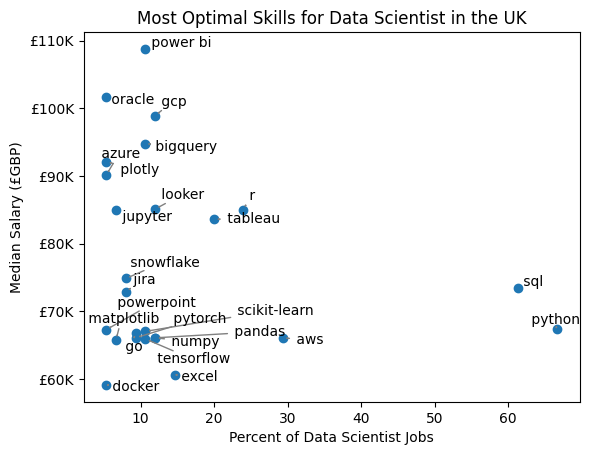

In [ ]:
from adjustText import adjust_text

plt.scatter(df_DS_skills_high_demand['skill_percent'], df_DS_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary (£GBP)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Scientist in the UK')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

Split int Quadrants

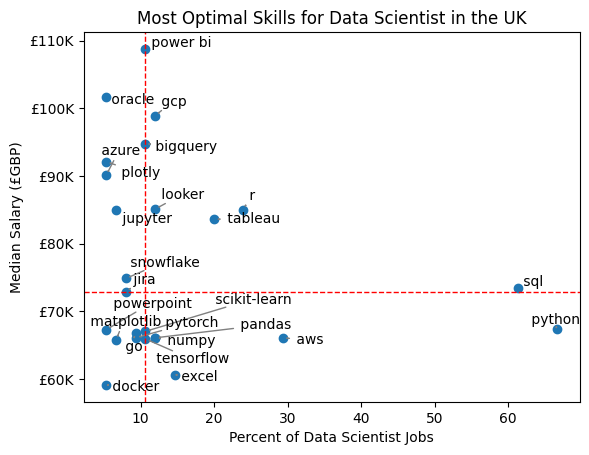

In [ ]:
#with quadrant lines
from adjustText import adjust_text
import matplotlib.pyplot as plt

# Assuming df_DS_skills_high_demand is your dataframe
plt.scatter(df_DS_skills_high_demand['skill_percent'], df_DS_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary (£GBP)')  # Assuming this is the label you want for the y-axis
plt.title('Most Optimal Skills for Data Scientist in the UK')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))  # Example formatting y-axis

# Calculate midpoints for x and y axes
x_median = df_DS_skills_high_demand['skill_percent'].median()
y_median = df_DS_skills_high_demand['median_salary'].median()

# Draw the quadrant lines
plt.axhline(y=y_median, color='red', linestyle='--', linewidth=1)
plt.axvline(x=x_median, color='red', linestyle='--', linewidth=1)

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()
